In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
if 'Cabin' in data.columns:
    data.drop('Cabin', axis=1, inplace=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])          # male=1, female=0
data['Embarked'] = le.fit_transform(data['Embarked'])  # C=0, Q=1, S=2


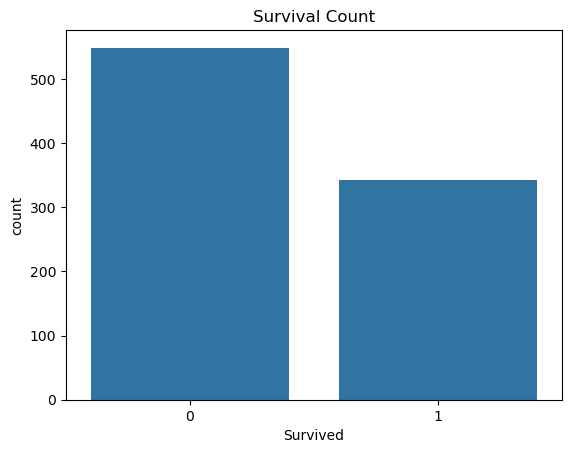

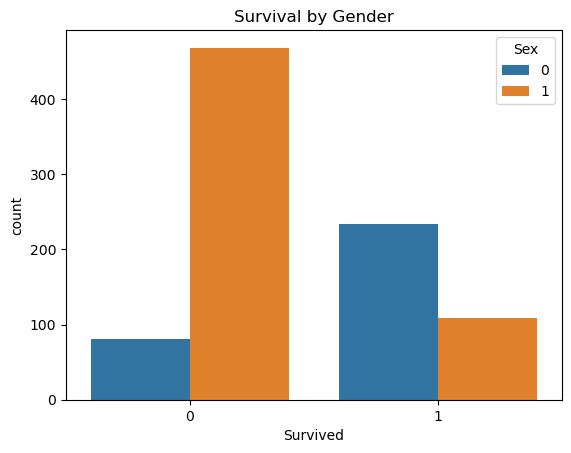

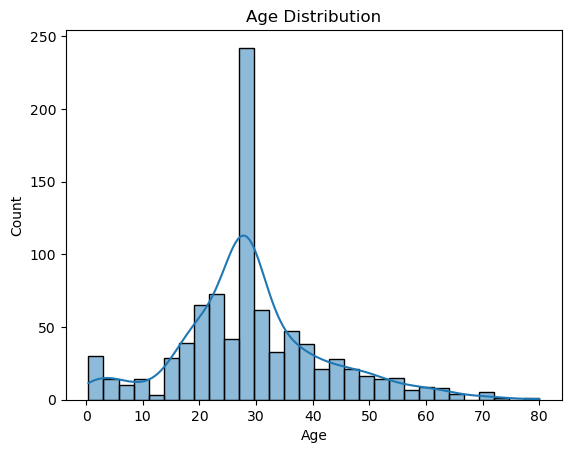

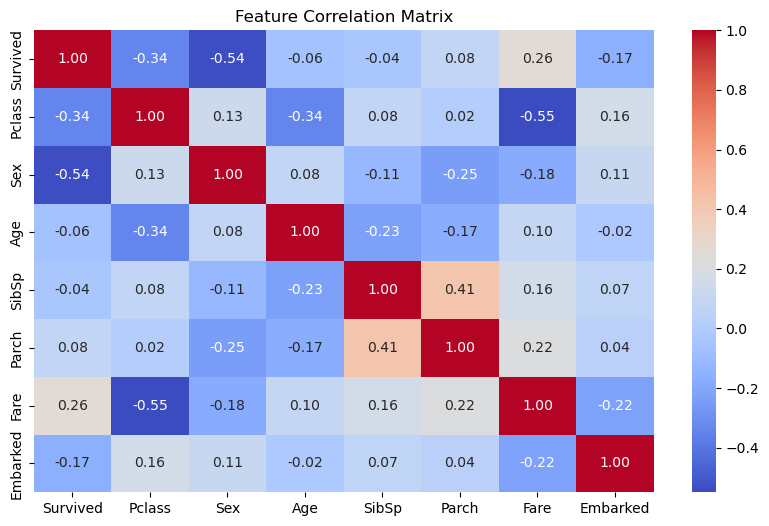

In [7]:
# Survival distribution
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()

# Gender vs survival
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title("Survival by Gender")
plt.show()

# Age distribution
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [9]:
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(),
    "Linear Regression": LinearRegression()
}



🔍 Evaluating Logistic Regression
✅ Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



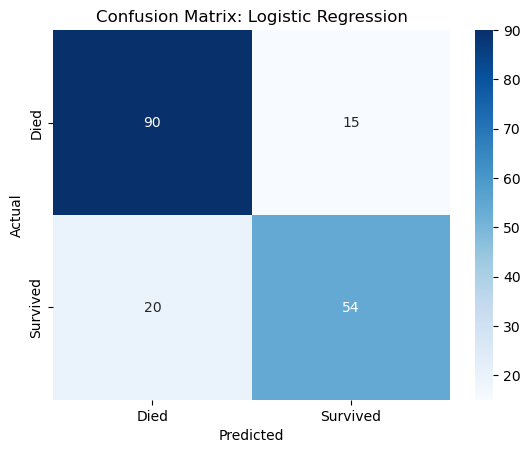


🔍 Evaluating K-Nearest Neighbors
✅ Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



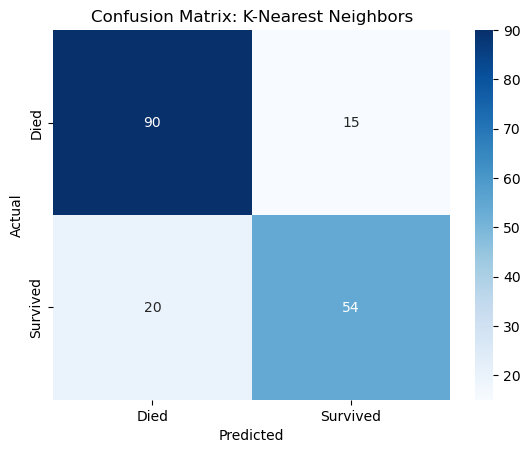


🔍 Evaluating Support Vector Machine
✅ Accuracy: 0.8156
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



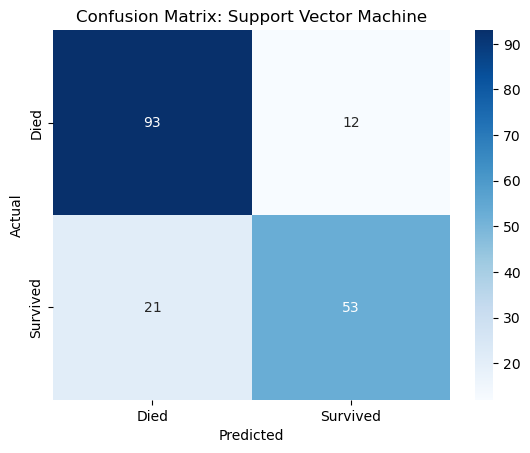


🔍 Evaluating Linear Regression
✅ Accuracy: 0.7933
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



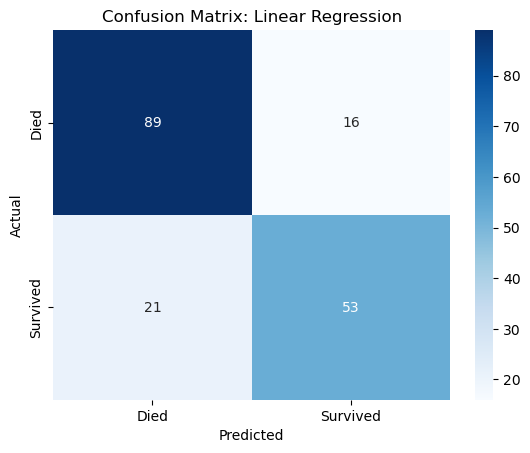

In [13]:
results = []

for name, model in models.items():
    print(f"\n🔍 Evaluating {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if name == "Linear Regression":
        y_pred = np.round(y_pred)  # Convert regression output to classification

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Died", "Survived"],
                yticklabels=["Died", "Survived"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


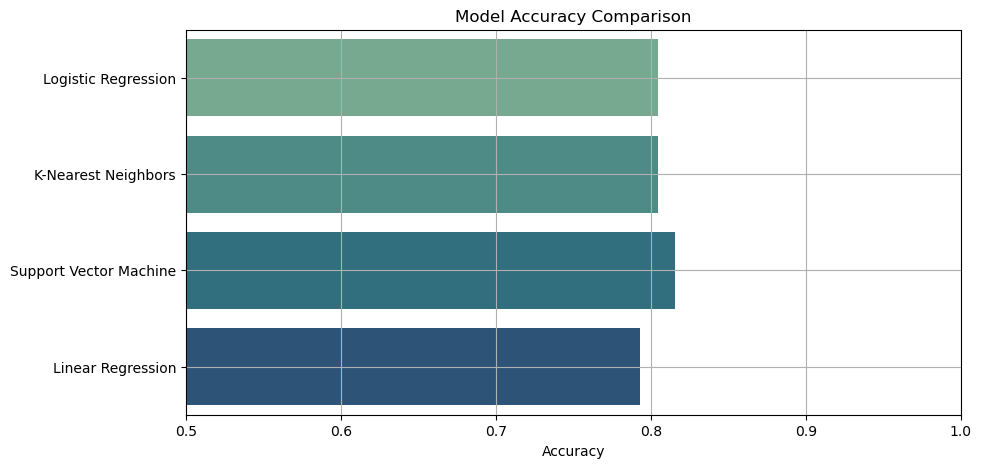

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(y=model_names, x=accuracy_scores, hue=model_names, palette='crest', legend=False)
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0.5, 1.0)
plt.grid(True)

# Add value labels on the bars
for i, v in enumerate(accuracy_scores):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

plt.show()

